# <font color='brown'>楼 + 机器学习实战</font>

# 挑战：训练手写字符识别神经网络

## 挑战介绍

上一个实验中，我们从感知机出发对人工神经网络的原理进行了介绍，并结合理论推导详细阐述了神经网络反向传播的过程。本次挑战中，我们将结合 `scikit-learn` 提供的人工神经网络实现方法，完成手写字符识别。

## 挑战知识点

- 人工神经网络
- 手写字符识别

---

## 挑战内容

### 手写字符数据集概览

本次挑战中，我们将使用手写字符数据集 Digits。该数据集的全称为 [Pen-Based Recognition of Handwritten Digits Data Set](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)，来源于 UCI 开放数据集网站。

数据集包含由 `1797` 张数字 `0` 到 `9` 的手写字符影像转换后的数字矩阵，目标值是 `0-9`。为了方便，这里直接使用 scikit-learn 提供的 `load_digits` 方法加载该数据集。

In [1]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()

加载完成的 digits 数据集中包含 3 个属性：

|  属性  |                  描述                  |
|:------:|:--------------------------------------:|
| `images` | 8x8 矩阵，记录每张手写字符图像对应的像素灰度值 |
|  `data`  | 将 images 对应的 8x8 矩阵转换为行向量 |
| `target` |     记录 1797 张影像各自代表的数字     |

下面，我们输出第一个手写字符查看。

**第一个字符图像对应的数字：**

In [2]:
digits.target[0]

0

**第一个字符图像对应的灰度值矩阵：**

In [3]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

**将矩阵扁平化为行向量：**

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

你可能感觉到数字总是不太直观。那么，我们可以根据灰度值矩阵，使用 Matplotlib 把字符对应的灰度图像绘制出来。

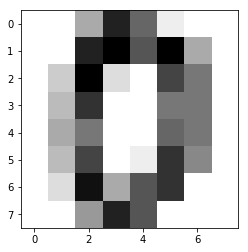

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

image1 = digits.images[0]
plt.imshow(image1, cmap=plt.cm.gray_r)

> cmap:colormap，常见有 viridis, plasma 等

上面的图像可以很明显看出来是手写字符 `0`。

---

**<font color='red'>挑战</font>：使用 `1x5` 的子图样式绘制 Digits 数据集前 `5` 个手写字符的图像。**

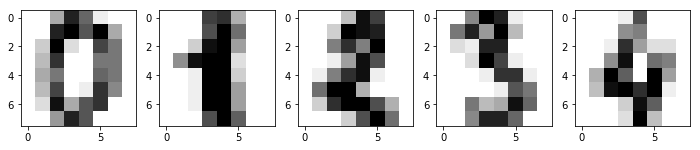

In [6]:
### 代码开始 ### (3～5 行代码)
fig, axes = plt.subplots(1, 5, figsize=(12,4))
for i, image in enumerate(digits.images[:5]):
    axes[i].imshow(image, cmap=plt.cm.gray_r)
### 代码结束 ###

**期望输出：**

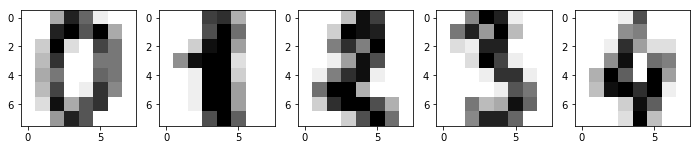

接下来，我们需要将数据集随机切分为训练集和测试集，以备后用。

---

**<font color='red'>挑战</font>：使用 `train_test_split()` 将数据集切分为 80%（训练集） 和 20%（测试集） 两部分。**

**<font color='blue'>规定</font>**：训练集特征，训练集目标，测试集特征，测试集目标分别定义为：`train_x, train_y, test_x, test_y`，随机数种子定为 `30`。

In [7]:
### 代码开始 ### (≈ 2 行代码)
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(digits.data, digits.target, test_size=0.2, random_state=30)
### 代码结束 ###

**运行测试：**

In [8]:
len(train_x),len(train_y),len(test_x),len(test_y),np.mean(test_y[5:13])

(1437, 1437, 360, 360, 3.75)

**期望输出：**

<div align="center">**`(1437, 1437, 360, 360, 3.75)`**</div>

### 使用 scikit-learn 搭建人工神经网络

scikit-learn 中的 `MLPClassifier()` 类实现了具有反向传播算法的多层神经网络结构。

```python
sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
```

该类的参数较多，我们介绍主要参数如下：

- `hidden_layer_sizes`：定义隐含层及包含的神经元数量，`(20, 20)` 代表 `2` 个隐含层各有 `20` 个神经元。
- `activation`：激活函数，有 identity（线性）, logistic, tanh, relu 可选。
- `solver`：求解方法，有 lbfgs（拟牛顿法），sgd（随机梯度下降），adam（改进型 sgd） 可选。adam 在相对较大的数据集上效果比较好（上千个样本），对小数据集而言，lbfgs 收敛更快效果也很好。 
- `alpha`：正则化项参数。
- `learning_rate`：学习率调整策略，constant（不变），invscaling（逐步减小），adaptive（自适应） 可选。
- `learning_rate_init`：初始学习率，用于随机梯度下降时更新权重。
- `max_iter`：最大迭代次数。
- `shuffle`：决定每次迭代是否重新打乱样本。
- `random_state`：随机数种子。
- `tol`: 优化求解的容忍度，当两次迭代损失差值小于该容忍度时，模型认为达到收敛并且训练停止。

接下来，我们准备使用 `MLPClassifier()` 构建一个神经网络预测模型。

---

**<font color='red'>挑战</font>：使用 `MLPClassifier()` 搭建神经网络结构，并训练手写字符识别模型，最后得到在测试集上的预测准确率。**

**<font color='blue'>规定</font>**：

- 神经网络结构包含 `2` 个隐含层，依次有 `100` 和 `50` 个神经元。
- 使用 `relu` 作为激活函数。
- 使用随机梯度下降 `SGD` 方法求解。
- 学习率为 `0.02` 且在学习过程中保持不变。
- 最大迭代次数为 `100` 次。
- 随机数种子设为 `1`。
- 其余参数使用默认值。

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def mpl():
    """
    参数:无

    返回:
    model -- 人工神经网络模型
    score -- 测试集上的预测准确率
    """
    ### 代码开始 ### (≈ 2 行代码)
    model = MLPClassifier(
        hidden_layer_sizes=(100, 50),
        activation='relu',
        solver='sgd',
        learning_rate_init=0.02,
        learning_rate='constant',
        max_iter=100,
        random_state=1
    )

    model.fit(train_x, train_y)
    score = accuracy_score(test_y, model.predict(test_x))
    ### 代码结束 ###
    return model, score

**运行测试：**

In [10]:
mpl()[1]

0.9805555555555555

**期望输出：**

<div align="center">**`> 0.95`**</div>

按照上面参数训练出来的神经网络一般准确率可以达到 `98%` 左右。我们可以输出 `model` 的一些属性，例如迭代的次数以及绘制迭代损失变化曲线。

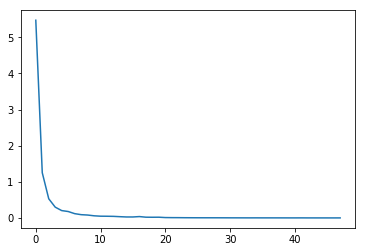

In [11]:
# 绘制损失变化曲线
model = mpl()[0]
plt.plot(model.loss_curve_)

In [12]:
# 输出模型达到收敛的迭代次数
model.n_iter_

48

---

<div style="color: #999;font-size: 12px;font-style: italic;">*本课程内容，由作者授权实验楼发布，未经允许，禁止转载、下载及非法传播。</div>